In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [2]:
# read data
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# X and y values
X=data.drop("Outcome",axis=True)
y=data["Outcome"]

In [5]:
# splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
# fitting
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)

# score and mse of train and test data
score = dt_classifier.score(X_train,y_train)
print("R-squared Train  :", score)

score = dt_classifier.score(X_test, y_test)
print("R-squared Test  :", score)

y_pred = dt_classifier.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)
print("RMSE :",mse**(1/2.0))

R-squared Train  : 1.0
R-squared Test  : 0.7056277056277056
MSE : 0.2943722943722944
RMSE : 0.5425608669746597


In [7]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

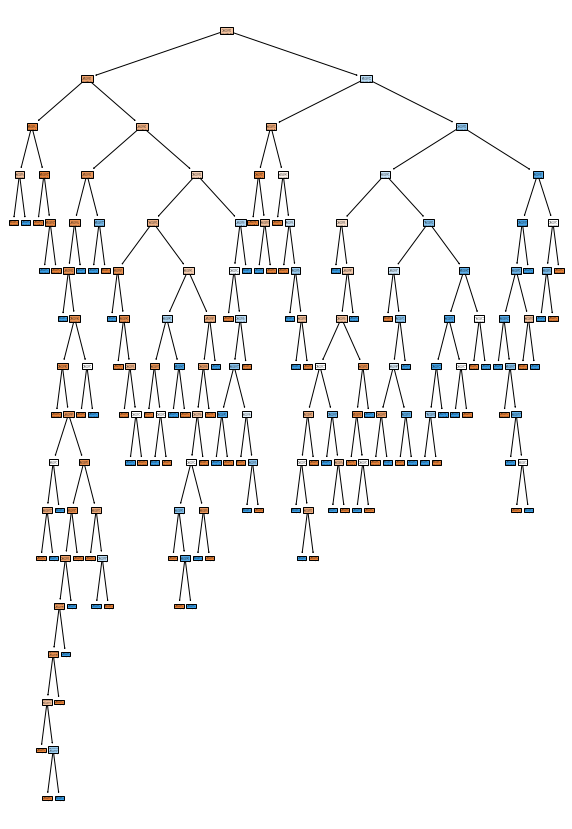

In [71]:
# plotting tree
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(dt_classifier,filled=True)
plt.show()

In [74]:
# entropy method---->max_depth=4 gives good accuracy
dt_classifier = DecisionTreeClassifier(criterion="entropy",max_depth=3)
dt_classifier.fit(X_train,y_train)

score = dt_classifier.score(X_train,y_train)
print("R-squared Train  :", score)

score = dt_classifier.score(X_test, y_test)
print("R-squared Test  :", score)

y_pred = dt_classifier.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)
print("RMSE :",mse**(1/2.0))

R-squared Train  : 0.7635009310986964
R-squared Test  : 0.7705627705627706
MSE : 0.22943722943722944
RMSE : 0.4789960641145493


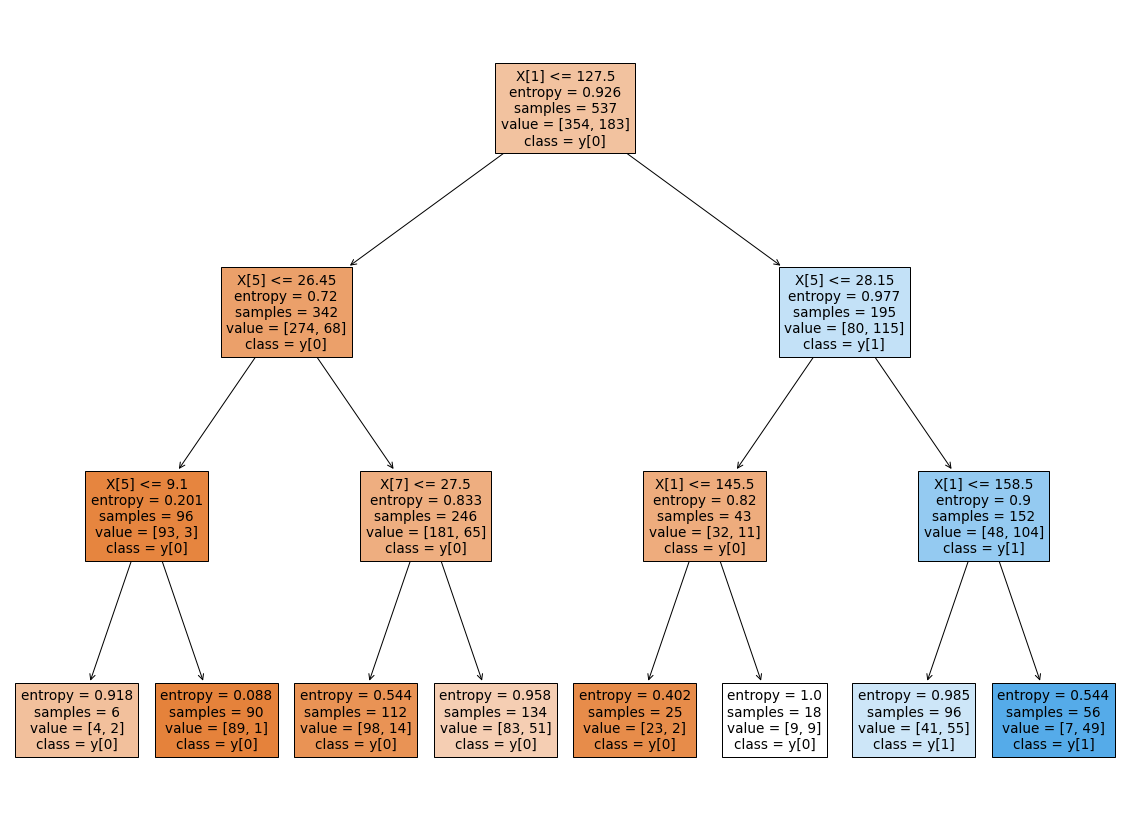

In [77]:
plt.figure(figsize=(20,15))
tree.plot_tree(dt_classifier,filled=True,class_names=True)
plt.show()

In [78]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64